data set rom http://datadrivenbuilding.org/100-EnerNOC-Commercial-Buildings


In [89]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [91]:
metafile='./meta/'

In [93]:
metadata=pd.read_csv(os.path.join(metafile,'all_sites.csv'))
metadata.head()

,SITE_ID,INDUSTRY,SUB_INDUSTRY,SQ_FT,LAT,LNG,TIME_ZONE,TZ_OFFSET
0,6,Commercial Property,Shopping Center/Shopping Mall,161532,34.783001,-106.895250,America/Denver,-06:00
1,8,Commercial Property,Shopping Center/Shopping Mall,823966,40.320247,-76.404942,America/New_York,-04:00
2,9,Commercial Property,Corporate Office,169420,40.946751,-74.742087,America/New_York,-04:00
3,10,Commercial Property,Shopping Center/Shopping Mall,1029798,39.732504,-75.006861,America/New_York,-04:00
4,12,Commercial Property,Business Services,179665,39.694541,-74.899166,America/New_York,-04:00


In [94]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
SITE_ID         100 non-null int64
INDUSTRY        100 non-null object
SUB_INDUSTRY    100 non-null object
SQ_FT           100 non-null int64
LAT             100 non-null float64
LNG             100 non-null float64
TIME_ZONE       100 non-null object
TZ_OFFSET       100 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 6.3+ KB


In [96]:
from IPython.display import HTML
HTML('<iframe src=http://enernoc-open.cartodb.com/tables/all_sites/embed_map?title=true&description=true&search=false&shareable=false&cartodb_logo=true&scrollwheel=true&sql=&sw_lat=25&sw_lon=-130&ne_lat=50&ne_lon=-60 width=800 height=700></iframe>')

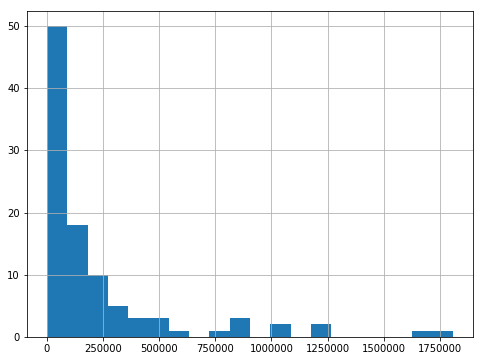

In [98]:
metadata.SQ_FT.hist(bins=20,figsize=(8,6))
plt.show()

In [100]:
meta=metadata.pivot(index='SITE_ID',columns='TIME_ZONE',values='SQ_FT')
meta.head()

TIME_ZONE,America/Chicago,America/Denver,America/Los_Angeles,America/New_York,America/Phoenix
SITE_ID,,,,,
6,NaN,161532.0,NaN,NaN,NaN
8,NaN,NaN,NaN,823966.0,NaN
9,NaN,NaN,NaN,169420.0,NaN
10,NaN,NaN,NaN,1029798.0,NaN
12,NaN,NaN,NaN,179665.0,NaN


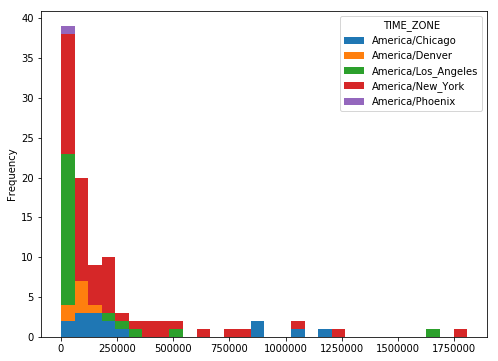

In [102]:
meta.plot(kind='hist',figsize=(8,6),bins=30,stacked=True)
plt.show()

In [104]:
filepath='./csv/'
data=pd.read_csv(os.path.join(filepath,'78.csv'),parse_dates=True,index_col=['dttm_utc'])
data=data.drop(['timestamp'],axis=1)
data.tail()

,value,estimated,anomaly
dttm_utc,,,
2012-12-31 23:40:00,111.2741,0,NaN
2012-12-31 23:45:00,109.2692,0,NaN
2012-12-31 23:50:00,109.2692,0,NaN
2012-12-31 23:55:00,110.7729,0,NaN
2013-01-01 00:00:00,110.2716,0,NaN


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105407 entries, 2012-01-01 00:10:00 to 2013-01-01 00:00:00
Data columns (total 3 columns):
value        105407 non-null float64
estimated    105407 non-null int64
anomaly      0 non-null float64
dtypes: float64(2), int64(1)
memory usage: 3.2 MB


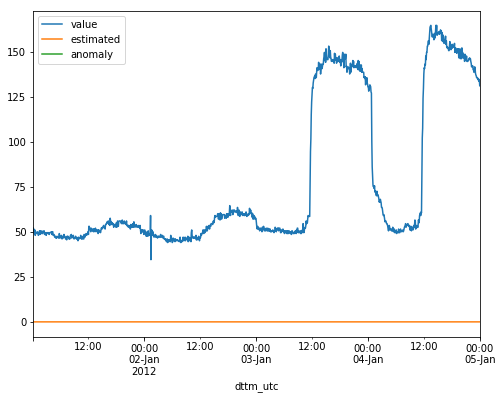

In [108]:
# observe just 5 days of data
data.truncate(after='2012-01-05').plot(figsize=(8,6))
plt.show()

In [110]:
#changing tz from utc to est

data=data.tz_localize('utc')
data=data.tz_convert('America/New_York')
data.head()

,value,estimated,anomaly
dttm_utc,,,
2011-12-31 19:10:00-05:00,52.1284,0,NaN
2011-12-31 19:15:00-05:00,51.6272,0,NaN
2011-12-31 19:20:00-05:00,49.6222,0,NaN
2011-12-31 19:25:00-05:00,49.1210,0,NaN
2011-12-31 19:30:00-05:00,51.1259,0,NaN


In [ ]:
data.truncate(before='2012-01-01',after='2012-01-02').plot()
plt.show()

In [112]:
# load multiple buildings

full={}
filepath='./csv/'
filelist=os.listdir(filepath)
for name in filelist[1:4]:
    df=pd.read_csv(os.path.join(filepath,name),parse_dates=True,index_col=['dttm_utc'])
    df=df.drop(['timestamp'],axis=1).tz_localize('utc')
    df=df.tz_convert('America/New_York')
    
    siteid=name[:-3]
    full[siteid]=df

In [113]:
fulldata=pd.concat(full,axis=1)
fulldata.head()

10.                      100.            \
                              value estimated anomaly   value estimated   
dttm_utc                                                                  
2011-12-31 19:05:00-05:00       NaN       NaN     NaN  4.7271         0   
2011-12-31 19:10:00-05:00  105.7895       0.0     NaN  5.2524         0   
2011-12-31 19:15:00-05:00  104.7318       0.0     NaN  5.5150         0   
2011-12-31 19:20:00-05:00  102.2920       0.0     NaN  5.2524         0   
2011-12-31 19:25:00-05:00  102.7851       0.0     NaN  5.2524         0   

                                      101.                    
                          anomaly    value estimated anomaly  
dttm_utc                                                      
2011-12-31 19:05:00-05:00     NaN  25.4666         0     NaN  
2011-12-31 19:10:00-05:00     NaN  25.7734         0     NaN  
2011-12-31 19:15:00-05:00     NaN  25.1598         0     NaN  
2011-12-31 19:20:00-05:00     NaN  25.1598         0     NaN  
2011-12-31 19:25:00-05:00     NaN  25.7734         0     NaN

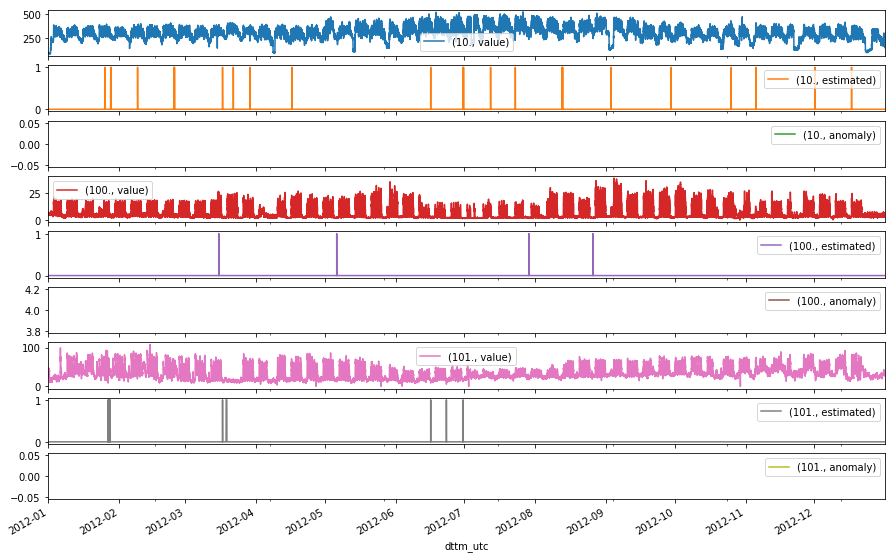

In [114]:
fulldata.plot(subplots=True,figsize=(15,10))
plt.show()

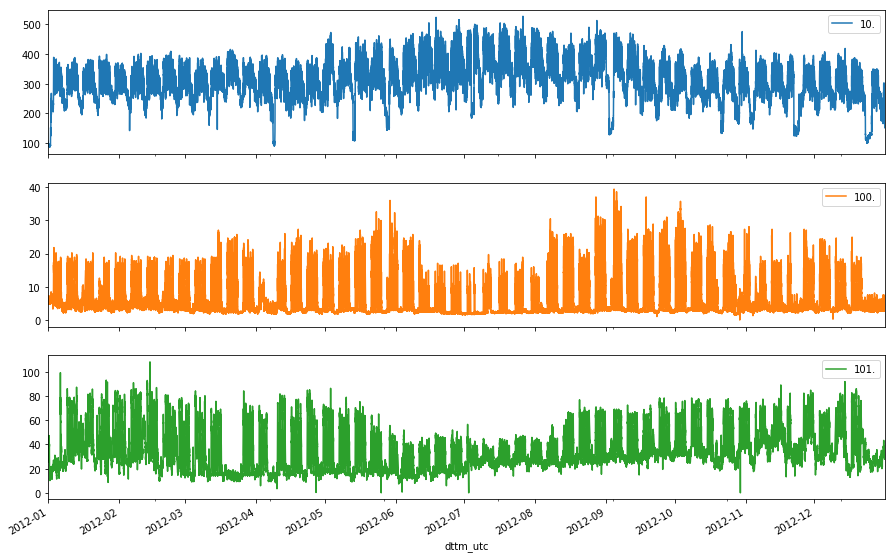

,10.,100.,101.
dttm_utc,,,
2011-12-31 19:05:00-05:00,NaN,4.7271,25.4666
2011-12-31 19:10:00-05:00,105.7895,5.2524,25.7734
2011-12-31 19:15:00-05:00,104.7318,5.5150,25.1598
2011-12-31 19:20:00-05:00,102.2920,5.2524,25.1598
2011-12-31 19:25:00-05:00,102.7851,5.2524,25.7734


In [115]:
#select only values data

fulldatavalue=fulldata.xs('value',level=1,axis=1)
fulldatavalue.plot(subplots=True,figsize=(15,10))
plt.show()
fulldatavalue.head()

In [168]:
full={}
for name in filelist:
    try:
        df=pd.read_csv(os.path.join(filepath,name),parse_dates=True,index_col=['dttm_utc'])
        df=df.drop(['timestamp'],axis=1).tz_localize('utc')
        df=df.tz_convert('America/New_York')
    
        siteid=name[:-4]
        full[siteid]=df
    except:
        print("error reading file"+name)

allraw=pd.concat(full,axis=1)        

error reading file.DS_Store
error reading fileindex.html


In [169]:
allrawvalue=allraw.xs('value',level=1,axis=1)
#allrawvalue.plot(subplots=True,figsize=(13,10))

In [170]:
#aggregating value by first taking hourly avg and then adding to get agregated demand

allrawvalue_hourly=allrawvalue.resample('H').mean()
allrawvalue_daily=allrawvalue_hourly.resample('D').sum()
allrawvalue_daily.head()

,10,100,101,103,109,111,116,12,13,136,...,786,8,805,808,832,88,887,9,92,99
dttm_utc,,,,,,,,,,,,,,,,,,,,,
2011-12-31 00:00:00-05:00,489.802767,26.984030,130.826536,62.145011,29.986980,39.974557,56.885104,127.593195,129.138368,12.796595,...,1224.202272,104.758982,12.971637,28.280365,90.694000,40.854894,282.415538,93.893338,9.078118,14.480113
2012-01-01 00:00:00-05:00,2198.538450,131.681167,602.453633,284.443733,143.815425,176.674983,287.952800,623.205550,631.337467,56.821650,...,5577.503133,513.900925,54.948200,137.739158,444.904508,180.451792,1378.371275,459.481867,43.883533,64.910083
2012-01-02 00:00:00-05:00,5061.351333,147.153750,417.897583,320.042758,164.944192,189.579908,344.266150,758.399242,768.295125,56.891567,...,5968.356758,558.132408,72.961308,153.923567,483.197742,193.632767,1454.759075,676.978700,48.940108,93.910300
2012-01-03 00:00:00-05:00,7072.599900,219.067425,537.917733,629.948908,178.675808,281.143433,424.962650,979.692267,992.475992,216.961267,...,5992.025550,2067.240392,297.688158,229.144658,1789.696333,287.154967,2820.192400,764.601158,69.210675,259.311892
2012-01-04 00:00:00-05:00,7448.382217,225.567192,498.823050,661.987542,295.663450,301.192192,509.240000,1002.780217,1015.865208,279.500242,...,5661.942875,3781.792658,308.550000,235.943467,3274.056092,307.632208,2942.556158,781.002008,71.101408,278.177400


In [123]:
allrawvalue_daily.plot(subplots=True,figsize=(15,200))
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


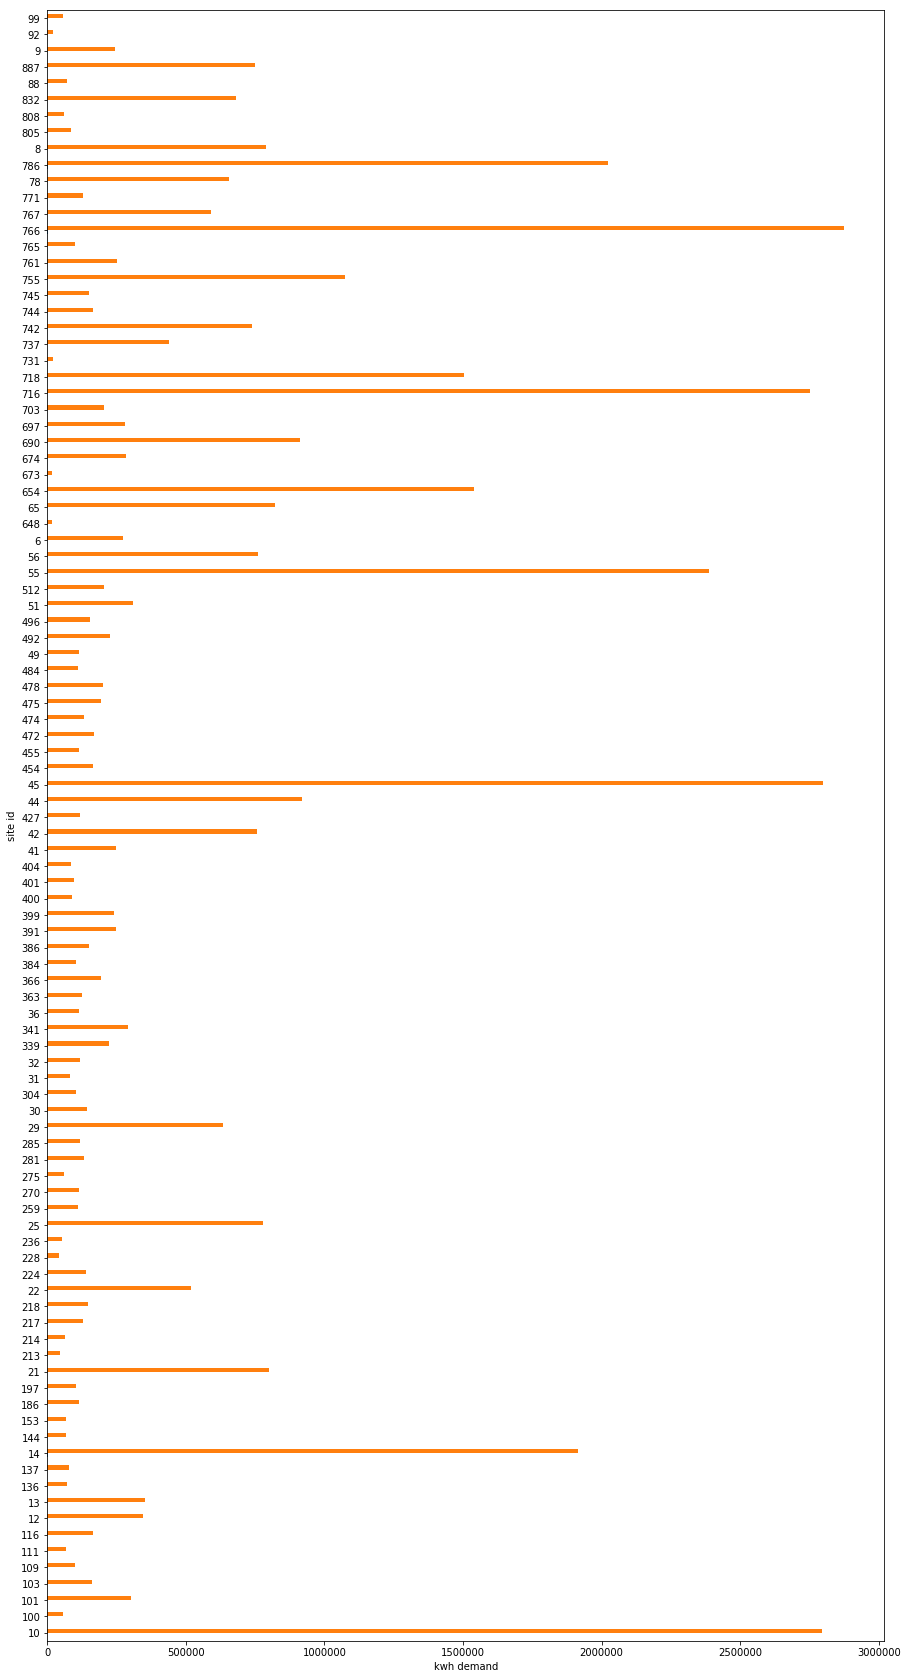

In [171]:
allrawvalue_annual=allrawvalue_daily.resample('A').sum()
allrawvalue_annual.T.plot(kind='barh',figsize=(15,30),legend=False)
plt.xlabel('kwh demand')
plt.ylabel('site id')
plt.show()

In [182]:
allrawvalue_annual=allrawvalue_annual.truncate(before='2012-01-01')
annualcons=allrawvalue_annual.T
annualcons.columns=['total kwh']
annualcons=annualcons.reset_index()
annualcons.head()

,index,total kwh
0,10,2.795001e+06
1,100,5.581907e+04
2,101,3.024699e+05
3,103,1.598590e+05
4,109,9.862084e+04


In [183]:
# to compare building size with consumption, first get the common factor site id in same format

print(metadata.info())
print(annualcons.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
SITE_ID         100 non-null object
INDUSTRY        100 non-null object
SUB_INDUSTRY    100 non-null object
SQ_FT           100 non-null int64
LAT             100 non-null float64
LNG             100 non-null float64
TIME_ZONE       100 non-null object
TZ_OFFSET       100 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 6.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
index        100 non-null object
total kwh    100 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [184]:
metadata['SITE_ID']=metadata['SITE_ID'].apply(str)
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
SITE_ID         100 non-null object
INDUSTRY        100 non-null object
SUB_INDUSTRY    100 non-null object
SQ_FT           100 non-null int64
LAT             100 non-null float64
LNG             100 non-null float64
TIME_ZONE       100 non-null object
TZ_OFFSET       100 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 6.3+ KB


In [188]:
building=pd.merge(annualcons,metadata,left_on='index',right_on='SITE_ID')
building.head()

,index,total kwh,SITE_ID,INDUSTRY,SUB_INDUSTRY,SQ_FT,LAT,LNG,TIME_ZONE,TZ_OFFSET
0,10,2.795001e+06,10,Commercial Property,Shopping Center/Shopping Mall,1029798,39.732504,-75.006861,America/New_York,-04:00
1,100,5.581907e+04,100,Education,Primary/Secondary School,81681,38.635116,-75.934014,America/New_York,-04:00
2,101,3.024699e+05,101,Education,Primary/Secondary School,274418,35.596749,-83.830657,America/Chicago,-05:00
3,103,1.598590e+05,103,Education,Primary/Secondary School,217241,38.009036,-75.376974,America/New_York,-04:00
4,109,9.862084e+04,109,Education,Primary/Secondary School,97901,36.286388,-87.110083,America/Chicago,-05:00


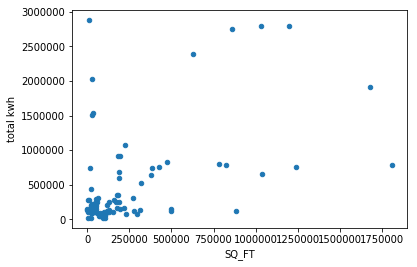

In [191]:
building.plot(kind='scatter',x='SQ_FT',y='total kwh')
plt.show()

In [194]:
building.INDUSTRY.unique()

array(['Commercial Property', 'Education', 'Food Sales & Storage',
       'Light Industrial'], dtype=object)

In [195]:
building['INDUSTRY']=building['INDUSTRY'].map({'Commercial Property':1,'Education':2,'Food Sales & Storage':3,'Light Industrial':4}).astype(int)

In [196]:
building.head()

,index,total kwh,SITE_ID,INDUSTRY,SUB_INDUSTRY,SQ_FT,LAT,LNG,TIME_ZONE,TZ_OFFSET
0,10,2.795001e+06,10,1,Shopping Center/Shopping Mall,1029798,39.732504,-75.006861,America/New_York,-04:00
1,100,5.581907e+04,100,2,Primary/Secondary School,81681,38.635116,-75.934014,America/New_York,-04:00
2,101,3.024699e+05,101,2,Primary/Secondary School,274418,35.596749,-83.830657,America/Chicago,-05:00
3,103,1.598590e+05,103,2,Primary/Secondary School,217241,38.009036,-75.376974,America/New_York,-04:00
4,109,9.862084e+04,109,2,Primary/Secondary School,97901,36.286388,-87.110083,America/Chicago,-05:00


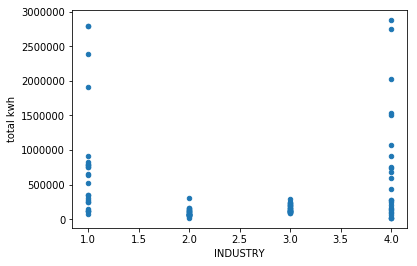

In [197]:
building.plot(kind='scatter',x='INDUSTRY',y='total kwh')
plt.show()